In [1]:
import pandas as pd

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error   # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
data=pd.read_csv('/home/shankar/Downloads/aicte/Batsman_Data.csv')
data1=pd.read_csv('/home/shankar/Downloads/aicte/Bowler_data.csv')
data2=pd.read_csv('/home/shankar/Downloads/aicte/Ground_Averages.csv')
data3=pd.read_csv('/home/shankar/Downloads/aicte/ODI_Match_Results.csv')
data4=pd.read_csv('/home/shankar/Downloads/aicte/ODI_Match_Totals.csv')
data5=pd.read_csv('/home/shankar/Downloads/aicte/WC_players.csv')

In [62]:
data.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [63]:
data1.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [64]:
data2.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [65]:
data3.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [66]:
data4.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [67]:
data5.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [68]:
df=[data, data1,data2, data3, data4, data5]

In [69]:
def dementions(df):
    for i in df:
        print(i.shape)
        print('*'*100)
        print(i.info())
        print('*'*100)
        print(i.isna().sum())

In [70]:
dementions(df)

(11149, 13)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB
None
****************************************************************************************************
Unnamed: 0    0
Bat1 

In [71]:
# Lets Check the Duplicates if avilable 
def remove_duplicates(df):
    for i in df:
        i.drop_duplicates(inplace=True)
        print(i.shape)
        print('*'*100)

In [72]:
remove_duplicates(df)

(11149, 13)
****************************************************************************************************
(11118, 14)
****************************************************************************************************
(106, 11)
****************************************************************************************************
(1322, 12)
****************************************************************************************************
(1296, 13)
****************************************************************************************************
(152, 3)
****************************************************************************************************


In [73]:
# Lets understand data at high level check the stastics of dataset
def stat_summary(df):
    for i in df:
        print(i.describe(include='all'))
        print('*'*100)

In [74]:
stat_summary(df)


         Unnamed: 0   Bat1   Runs     BF     SR     4s     6s   Opposition   
count   11149.00000  11149  11149  11149  11149  11149  11149        11149  \
unique          NaN    323    180    163   2032     26     17           22   
top             NaN    DNB      -      -      -      0      0  v Sri Lanka   
freq            NaN   2043   2231   2231   2331   2901   6368         1283   
mean     5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
std      3218.58341    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
min         1.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
25%      2788.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
50%      5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
75%      8362.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
max     11149.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   

       Ground   Start Date    Match_ID    Batsman     Player_ID

In [75]:
# As our data set has start date or date column so lets first seaprate them into day, month and year wise and drop the orignal one
def seprate_date(df):
    for i in range(len(df)):
        if 'Start Date' in df[i].columns:
            df[i]['Year']=pd.to_datetime(df[i]['Start Date'])
            df[i]['Month']=df[i]['Year'].apply(lambda x:x.month) # Extracting Month
            df[i]['Day']=df[i]['Year'].apply(lambda x:x.day)  # Extracting day
            df[i]['year']=df[i]['Year'].apply(lambda x:x.year)  # Extracting year
            print(df[i].head())
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have 'Satrt Date' column")
            print("-------------------------")
            

In [76]:
seprate_date(df)

   Unnamed: 0 Bat1 Runs BF SR 4s 6s    Opposition   Ground   Start Date   
0           1  DNB    -  -  -  -  -       v India   Nagpur  18 Dec 2009  \
1           2  DNB    -  -  -  -  -       v India  Kolkata  24 Dec 2009   
2           3  DNB    -  -  -  -  -       v India    Delhi  27 Dec 2009   
3           4  DNB    -  -  -  -  -  v Bangladesh    Dhaka   4 Jan 2010   
4           5  DNB    -  -  -  -  -       v India    Dhaka   5 Jan 2010   

     Match_ID        Batsman  Player_ID       Year  Month  Day  year  
0  ODI # 2933  Oshane Thomas      49619 2009-12-18     12   18  2009  
1  ODI # 2935  Oshane Thomas      49619 2009-12-24     12   24  2009  
2  ODI # 2936  Oshane Thomas      49619 2009-12-27     12   27  2009  
3  ODI # 2937  Oshane Thomas      49619 2010-01-04      1    4  2010  
4  ODI # 2938  Oshane Thomas      49619 2010-01-05      1    5  2010  
-------------------------
   Unnamed: 0 Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground   
0           1   8

In [77]:
# Drop irrelavent columns from the datasets
def drop_irrelevant(df):
    for i in range(len(df)):
        columns_to_drop = ['Unnamed: 0', 'Start Date', 'Year']
        irrelevant_columns = [col for col in columns_to_drop if col in df[i].columns]
        
        if irrelevant_columns:
            df[i].drop(columns=irrelevant_columns, axis=1, inplace=True)
            print("DataFrame", i, "after dropping irrelevant columns:")
            print(df[i].head())  # Printing the DataFrame after dropping columns
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have any irrelevant columns")
            print("-------------------------")

In [34]:
drop_irrelevant(df)

DataFrame 0 does not have any irrelevant columns
-------------------------
DataFrame 1 after dropping irrelevant columns:
  Bat1 Runs BF SR 4s 6s    Opposition   Ground    Match_ID        Batsman   
0  DNB    -  -  -  -  -       v India   Nagpur  ODI # 2933  Oshane Thomas  \
1  DNB    -  -  -  -  -       v India  Kolkata  ODI # 2935  Oshane Thomas   
2  DNB    -  -  -  -  -       v India    Delhi  ODI # 2936  Oshane Thomas   
3  DNB    -  -  -  -  -  v Bangladesh    Dhaka  ODI # 2937  Oshane Thomas   
4  DNB    -  -  -  -  -       v India    Dhaka  ODI # 2938  Oshane Thomas   

   Player_ID  Month  Day  year  
0      49619     12   18  2009  
1      49619     12   24  2009  
2      49619     12   27  2009  
3      49619      1    4  2010  
4      49619      1    5  2010  
-------------------------
DataFrame 2 after dropping irrelevant columns:
  Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground    Match_ID   
0   8.0    0   57    0  7.12      -     -       v India   Nagpur

In [78]:
data

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,Year,Month,Day,year
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619,2009-12-18,12,18,2009
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619,2009-12-24,12,24,2009
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619,2009-12-27,12,27,2009
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619,2010-01-04,1,4,2010
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619,2010-01-05,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,11145,46,46,61,75.40,6,1,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048,2019-02-28,2,28,2019
11145,11146,3,3,6,50.00,0,0,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048,2019-03-02,3,2,2019
11146,11147,1,1,8,12.50,0,0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048,2019-03-08,3,8,2019
11147,11148,DNB,-,-,-,-,-,v Scotland,Edinburgh,10 May 2019,ODI # 4131,Gulbadin Naib,352048,2019-05-10,5,10,2019


In [79]:
data1

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID,Year,Month,Day,year
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619,2009-12-18,12,18,2009
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619,2009-12-24,12,24,2009
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619,2009-12-27,12,27,2009
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619,2010-01-04,1,4,2010
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619,2010-01-05,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,11114,4.0,0,41,0,10.25,-,-,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Gulbadin Naib,352048,2018-09-25,9,25,2018
11114,11115,7.2,0,20,2,2.72,10.00,22.0,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048,2019-02-28,2,28,2019
11115,11116,-,-,-,-,-,-,-,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048,2019-03-02,3,2,2019
11116,11117,6.0,0,21,1,3.50,21.00,36.0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048,2019-03-08,3,8,2019


In [80]:
data2

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...,...,...
101,"Greenfield International Stadium, Thiruvananth...",2018-2018,1,1,0,0,209,11,280,19.00,4.47
102,Sylhet International Cricket Stadium - Bangladesh,2018-2018,1,1,0,0,400,11,531,36.36,4.51
103,"Rajiv Gandhi International Cricket Stadium, De...",2019-2019,5,4,0,1,1864,67,2524,27.82,4.43
104,"Wanderers Cricket Ground, Windhoek - Namibia",2019-2019,1,1,0,0,307,17,474,18.05,3.88


In [81]:
data3

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year,Month,Day,year
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7,2013-01-03,1,3,2013
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6,2013-01-03,1,3,2013
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7,2013-01-06,1,6,2013
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6,2013-01-06,1,6,2013
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8,2013-01-11,1,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,997,won,3 wickets,3.0,won,2nd,v Pakistan,Nottingham,17 May 2019,ODI # 4138,England,1,2019-05-17,5,17,2019
1318,282,aban,-,NaN,-,-,v Scotland,Edinburgh,18 May 2019,ODI # 4138a,SriLanka,8,2019-05-18,5,18,2019
1319,1322,-,-,NaN,won,2nd,v Ireland,Belfast,19 May 2019,ODI # 4139,Afghanistan,40,2019-05-19,5,19,2019
1320,559,-,-,NaN,lost,2nd,v England,Leeds,19 May 2019,ODI # 4140,Pakistan,7,2019-05-19,5,19,2019


In [82]:
data4

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year,Month,Day,year
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7,2013-01-03,1,3,2013
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6,2013-01-03,1,3,2013
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7,2013-01-06,1,6,2013
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6,2013-01-06,1,6,2013
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8,2013-01-11,1,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,549,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,17 May 2019,ODI # 4138,Pakistan,7,2019-05-17,5,17,2019
1292,979,341/7,49.3,6.88,341.0,2,won,v Pakistan,Nottingham,17 May 2019,ODI # 4138,England,1,2019-05-17,5,17,2019
1293,1296,120/8,33.0,3.63,211.0,2,-,v Ireland,Belfast,19 May 2019,ODI # 4139,Afghanistan,40,2019-05-19,5,19,2019
1294,550,193/6,31.5,6.06,352.0,2,-,v England,Leeds,19 May 2019,ODI # 4140,Pakistan,7,2019-05-19,5,19,2019


In [83]:
data5 

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan
...,...,...,...
147,Ashley Nurse,315594,WestIndies
148,Nicholas Pooran (wk),604302,WestIndies
149,Kemar Roach,230553,WestIndies
150,Andre Russell,276298,WestIndies


In [84]:
df_list=[data,data1,data2,data3,data4,data5]

In [85]:
from sklearn.preprocessing import LabelEncoder

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def get_categorical_columns(df_list):
    cat_col_list = []  # List to store categorical column names for each DataFrame

    for df in df_list:
        cat_col = []  # List to store categorical column names for the current DataFrame
        features = df.columns.values.tolist()

        for col in features:
            if df[col].dtype not in numerics:  # Check if the column's data type is non-numeric
                cat_col.append(col)

        cat_col_list.append(cat_col)

    return cat_col_list

def label_encode_categorical_columns(df_list):
    label = LabelEncoder()

    categorical_columns_list = get_categorical_columns(df_list)

    for i, cat_col in enumerate(categorical_columns_list):
        for col in cat_col:
            encoded_values = label.fit_transform(df_list[i][col])
            df_list[i][col] = encoded_values

In [86]:
label_encode_categorical_columns(df_list)

In [87]:
data3.isnull().sum()

Unnamed: 0      0
Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
Year            0
Month           0
Day             0
year            0
dtype: int64

In [88]:
data4.isnull().sum() 

Unnamed: 0      0
Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
Year            0
Month           0
Day             0
year            0
dtype: int64

In [89]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_list2 = [data3, data4]

def treat_missing_value(df_list2):
    for i in range(len(df_list2)):
        df_imputed = imputer.fit_transform(df_list2[i])
        df_list2[i] = pd.DataFrame(df_imputed, columns=df_list2[i].columns)
        print("DataFrame", i, "after imputation:")
        print(df_list2[i].isnull().sum()) #Lets Check the Values treated well or not
        print("-------------------------")

In [90]:
treat_missing_value(df_list2)

DataFrame 0 after imputation:
Unnamed: 0    0
Result        0
Margin        0
BR            0
Toss          0
Bat           0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Country       0
Country_ID    0
Year          0
Month         0
Day           0
year          0
dtype: int64
-------------------------
DataFrame 1 after imputation:
Unnamed: 0    0
Score         0
Overs         0
RPO           0
Target        0
Inns          0
Result        0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Country       0
Country_ID    0
Year          0
Month         0
Day           0
year          0
dtype: int64
-------------------------


In [91]:
data3=df_list2[0]
data4=df_list2[1]

In [92]:
data

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,Year,Month,Day,year
0,1,319,0,0,0,0,0,9,92,492,759,113,49619,691,12,18,2009
1,2,319,0,0,0,0,0,9,78,864,761,113,49619,693,12,24,2009
2,3,319,0,0,0,0,0,9,37,1030,762,113,49619,694,12,27,2009
3,4,319,0,0,0,0,0,4,38,1327,763,113,49619,695,1,4,2010
4,5,319,0,0,0,0,0,9,38,1374,764,113,49619,696,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,11145,203,121,121,1409,22,2,10,36,1082,1809,42,352048,1600,2,28,2019
11145,11146,167,103,119,969,1,1,10,36,622,1810,42,352048,1601,3,2,2019
11146,11147,2,2,141,330,1,1,10,36,1553,1817,42,352048,1605,3,8,2019
11147,11148,319,0,0,0,0,0,16,46,93,1834,42,352048,1618,5,10,2019


In [93]:
data1

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID,Year,Month,Day,year
0,1,49,1,59,1,412,0,0,9,92,492,759,138,49619,691,12,18,2009
1,2,12,1,57,3,316,103,77,9,78,863,761,138,49619,693,12,24,2009
2,3,0,0,0,0,0,0,0,9,37,1029,762,138,49619,694,12,27,2009
3,4,55,2,66,3,406,120,70,4,38,1326,763,138,49619,695,1,4,2010
4,5,49,2,49,1,349,0,0,9,38,1373,764,138,49619,696,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,11114,25,1,42,1,35,0,0,9,40,961,1758,42,352048,1554,9,25,2018
11114,11115,45,1,19,3,112,5,60,10,36,1081,1809,42,352048,1600,2,28,2019
11115,11116,0,0,0,0,0,0,0,10,36,621,1810,42,352048,1601,3,2,2019
11116,11117,37,1,20,2,171,80,83,10,36,1552,1817,42,352048,1605,3,8,2019


In [95]:
data2

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,23,4,4,4,0,0,2161,72,2297,30.01,5.64
1,26,6,4,4,0,0,1789,75,2331,23.85,4.60
2,55,6,15,15,0,0,7656,217,8482,35.28,5.41
3,76,2,2,2,0,0,1163,26,1200,44.73,5.81
4,0,6,10,10,0,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...,...,...
101,32,18,1,1,0,0,209,11,280,19.00,4.47
102,90,18,1,1,0,0,400,11,531,36.36,4.51
103,70,19,5,4,0,1,1864,67,2524,27.82,4.43
104,100,19,1,1,0,0,307,17,474,18.05,3.88


In [96]:
data3

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year,Month,Day,year
0,418.0,6.0,160.0,51.958026,1.0,1.0,5.0,57.0,480.0,0.0,6.0,7.0,0.0,1.0,3.0,2013.0
1,692.0,3.0,160.0,49.815818,2.0,2.0,11.0,57.0,480.0,0.0,4.0,6.0,0.0,1.0,3.0,2013.0
2,419.0,3.0,3.0,26.676731,1.0,2.0,5.0,29.0,569.0,1.0,6.0,7.0,1.0,1.0,6.0,2013.0
3,693.0,6.0,3.0,24.583990,2.0,1.0,11.0,29.0,569.0,1.0,4.0,6.0,1.0,1.0,6.0,2013.0
4,121.0,3.0,10.0,30.050350,1.0,2.0,1.0,63.0,45.0,2.0,8.0,8.0,2.0,1.0,11.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,997.0,6.0,99.0,3.000000,2.0,2.0,11.0,72.0,182.0,755.0,3.0,1.0,646.0,5.0,17.0,2019.0
1318,282.0,1.0,0.0,42.125564,0.0,0.0,12.0,38.0,200.0,756.0,8.0,8.0,647.0,5.0,18.0,2019.0
1319,1322.0,0.0,0.0,34.090781,2.0,2.0,6.0,7.0,227.0,757.0,0.0,40.0,648.0,5.0,19.0,2019.0
1320,559.0,0.0,0.0,38.031261,1.0,2.0,3.0,60.0,227.0,758.0,6.0,7.0,648.0,5.0,19.0,2019.0


In [97]:
data4

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year,Month,Day,year
0,412.0,404.0,48.3,165.0,235.320181,1.0,4.0,5.0,57.0,469.0,0.0,6.0,7.0,0.0,1.0,3.0,2013.0
1,680.0,115.0,48.0,25.0,251.000000,2.0,1.0,11.0,57.0,469.0,0.0,4.0,6.0,0.0,1.0,3.0,2013.0
2,413.0,93.0,48.5,18.0,168.000000,2.0,1.0,5.0,29.0,558.0,1.0,6.0,7.0,1.0,1.0,6.0,2013.0
3,681.0,120.0,43.4,48.0,169.008215,1.0,4.0,11.0,29.0,558.0,1.0,4.0,6.0,1.0,1.0,6.0,2013.0
4,117.0,199.0,40.0,146.0,306.000000,2.0,1.0,1.0,63.0,44.0,2.0,8.0,8.0,2.0,1.0,11.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,549.0,750.0,50.0,309.0,382.827531,1.0,1.0,3.0,72.0,179.0,739.0,6.0,7.0,633.0,5.0,17.0,2019.0
1292,979.0,753.0,49.3,315.0,341.000000,2.0,4.0,11.0,72.0,179.0,739.0,3.0,1.0,633.0,5.0,17.0,2019.0
1293,1296.0,27.0,33.0,38.0,211.000000,2.0,0.0,6.0,7.0,222.0,740.0,0.0,40.0,634.0,5.0,19.0,2019.0
1294,550.0,187.0,31.5,249.0,352.000000,2.0,0.0,3.0,60.0,222.0,741.0,6.0,7.0,634.0,5.0,19.0,2019.0


In [98]:
data5

,Player,ID,Country
0,42,352048,0
1,118,793463,0
2,5,440963,0
3,13,320652,0
4,30,516561,0
...,...,...,...
147,14,315594,9
148,111,604302,9
149,75,230553,9
150,10,276298,9


In [99]:
batsman_join_bowler=pd.merge(data,data1,on=['Match_ID','Player_ID','Opposition','Ground','Month','Day','year'], how='inner')
batsman_join_bowler

,Unnamed: 0_x,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Start Date_x,...,Overs,Mdns,Runs_y,Wkts,Econ,Ave,SR_y,Start Date_y,Bowler,Year_y
0,1,319,0,0,0,0,0,9,92,492,...,49,1,59,1,412,0,0,492,138,691
1,2,319,0,0,0,0,0,9,78,864,...,12,1,57,3,316,103,77,863,138,693
2,3,319,0,0,0,0,0,9,37,1030,...,0,0,0,0,0,0,0,1029,138,694
3,4,319,0,0,0,0,0,4,38,1327,...,55,2,66,3,406,120,70,1326,138,695
4,5,319,0,0,0,0,0,9,38,1374,...,49,2,49,1,349,0,0,1373,138,696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,11144,99,57,104,826,2,1,9,40,962,...,25,1,42,1,35,0,0,961,42,1554
11114,11145,203,121,121,1409,22,2,10,36,1082,...,45,1,19,3,112,5,60,1081,42,1600
11115,11146,167,103,119,969,1,1,10,36,622,...,0,0,0,0,0,0,0,621,42,1601
11116,11147,2,2,141,330,1,1,10,36,1553,...,37,1,20,2,171,80,83,1552,42,1605


In [100]:
batsman_join_bowler.columns

Index(['Unnamed: 0_x', 'Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s',
       'Opposition', 'Ground', 'Start Date_x', 'Match_ID', 'Batsman',
       'Player_ID', 'Year_x', 'Month', 'Day', 'year', 'Unnamed: 0_y', 'Overs',
       'Mdns', 'Runs_y', 'Wkts', 'Econ', 'Ave', 'SR_y', 'Start Date_y',
       'Bowler', 'Year_y'],
      dtype='object')

In [101]:
data2.columns


Index(['Ground', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts', 'Balls',
       'Ave', 'RPO'],
      dtype='object')

In [102]:
batsman_join_bowler_GrondAvg=pd.merge(batsman_join_bowler,data2,on=['Ground'], how='inner')
batsman_join_bowler_GrondAvg

,Unnamed: 0_x,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Start Date_x,...,Span,Mat,Won,Tied,NR,Runs,Wkts_y,Balls,Ave_y,RPO
0,1,319,0,0,0,0,0,9,92,492,...,6,16,14,0,2,6890,202,7508,34.10,5.50
1,629,12,7,21,1757,24,10,9,92,1611,...,6,16,14,0,2,6890,202,7508,34.10,5.50
2,731,217,128,104,240,3,1,9,92,719,...,6,16,14,0,2,6890,202,7508,34.10,5.50
3,1750,184,111,81,572,20,1,9,92,492,...,6,16,14,0,2,6890,202,7508,34.10,5.50
4,2271,319,0,0,0,0,0,9,92,193,...,6,16,14,0,2,6890,202,7508,34.10,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,11093,217,128,117,1780,22,2,10,36,1553,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9075,11094,180,109,84,389,13,9,10,36,89,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9076,11145,203,121,121,1409,22,2,10,36,1082,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9077,11146,167,103,119,969,1,1,10,36,622,...,4,4,4,0,0,1664,56,1987,29.71,5.02


In [103]:
batsman_join_bowler_GrondAvg.columns

Index(['Unnamed: 0_x', 'Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s',
       'Opposition', 'Ground', 'Start Date_x', 'Match_ID', 'Batsman',
       'Player_ID', 'Year_x', 'Month', 'Day', 'year', 'Unnamed: 0_y', 'Overs',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Start Date_y',
       'Bowler', 'Year_y', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs',
       'Wkts_y', 'Balls', 'Ave_y', 'RPO'],
      dtype='object')

In [104]:
data3.columns

Index(['Unnamed: 0', 'Result', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition',
       'Ground', 'Start Date', 'Match_ID', 'Country', 'Country_ID', 'Year',
       'Month', 'Day', 'year'],
      dtype='object')

In [105]:
data4.columns

Index(['Unnamed: 0', 'Score', 'Overs', 'RPO', 'Target', 'Inns', 'Result',
       'Opposition', 'Ground', 'Start Date', 'Match_ID', 'Country',
       'Country_ID', 'Year', 'Month', 'Day', 'year'],
      dtype='object')

In [106]:
OD_Total_result=pd.merge(data3,data4,on=['Ground','Country','Country_ID','Month','Day','year','Opposition'], how='inner')
OD_Total_result

,Unnamed: 0_x,Result_x,Margin,BR,Toss,Bat,Opposition,Ground,Start Date_x,Match_ID_x,...,Unnamed: 0_y,Score,Overs,RPO,Target,Inns,Result_y,Start Date_y,Match_ID_y,Year_y
0,418.0,6.0,160.0,51.958026,1.0,1.0,5.0,57.0,480.0,0.0,...,412.0,404.0,48.3,165.0,235.320181,1.0,4.0,469.0,0.0,0.0
1,692.0,3.0,160.0,49.815818,2.0,2.0,11.0,57.0,480.0,0.0,...,680.0,115.0,48.0,25.0,251.000000,2.0,1.0,469.0,0.0,0.0
2,419.0,3.0,3.0,26.676731,1.0,2.0,5.0,29.0,569.0,1.0,...,413.0,93.0,48.5,18.0,168.000000,2.0,1.0,558.0,1.0,1.0
3,693.0,6.0,3.0,24.583990,2.0,1.0,11.0,29.0,569.0,1.0,...,681.0,120.0,43.4,48.0,169.008215,1.0,4.0,558.0,1.0,1.0
4,121.0,3.0,10.0,30.050350,1.0,2.0,1.0,63.0,45.0,2.0,...,117.0,199.0,40.0,146.0,306.000000,2.0,1.0,44.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,558.0,3.0,99.0,3.000000,1.0,1.0,3.0,72.0,182.0,755.0,...,549.0,750.0,50.0,309.0,382.827531,1.0,1.0,179.0,739.0,633.0
1292,997.0,6.0,99.0,3.000000,2.0,2.0,11.0,72.0,182.0,755.0,...,979.0,753.0,49.3,315.0,341.000000,2.0,4.0,179.0,739.0,633.0
1293,1322.0,0.0,0.0,34.090781,2.0,2.0,6.0,7.0,227.0,757.0,...,1296.0,27.0,33.0,38.0,211.000000,2.0,0.0,222.0,740.0,634.0
1294,559.0,0.0,0.0,38.031261,1.0,2.0,3.0,60.0,227.0,758.0,...,550.0,187.0,31.5,249.0,352.000000,2.0,0.0,222.0,741.0,634.0


In [107]:
batsman_join_bowler_GrondAvg_OD=pd.merge(batsman_join_bowler_GrondAvg,OD_Total_result,on=['Ground','Month','Day','year'], how='inner')
batsman_join_bowler_GrondAvg_OD

,Unnamed: 0_x_x,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Start Date_x_x,...,Unnamed: 0_y_y,Score,Overs_y,RPO_y,Target,Inns,Result_y,Start Date_y_y,Match_ID_y,Year_y_y
0,19,140,86,14,677,1,1,15,1,915,...,145.0,294.0,48.5,111.0,297.614460,1.0,1.0,355.0,123.0,112.0
1,19,140,86,14,677,1,1,15,1,915,...,444.0,298.0,41.1,196.0,226.000000,2.0,4.0,355.0,123.0,112.0
2,1152,0,1,108,1,1,1,15,1,915,...,145.0,294.0,48.5,111.0,297.614460,1.0,1.0,355.0,123.0,112.0
3,1152,0,1,108,1,1,1,15,1,915,...,444.0,298.0,41.1,196.0,226.000000,2.0,4.0,355.0,123.0,112.0
4,1478,277,158,141,4,2,1,15,1,915,...,145.0,294.0,48.5,111.0,297.614460,1.0,1.0,355.0,123.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,10765,191,115,131,1056,2,2,10,36,89,...,409.0,734.0,50.0,297.0,299.827589,1.0,4.0,35.0,719.0,616.0
1040,11012,284,161,16,1375,22,9,10,36,89,...,274.0,29.0,24.0,154.0,193.000000,2.0,1.0,35.0,719.0,616.0
1041,11012,284,161,16,1375,22,9,10,36,89,...,409.0,734.0,50.0,297.0,299.827589,1.0,4.0,35.0,719.0,616.0
1042,11094,180,109,84,389,13,9,10,36,89,...,274.0,29.0,24.0,154.0,193.000000,2.0,1.0,35.0,719.0,616.0


In [108]:
batsman_join_bowler_GrondAvg_OD.columns

Index(['Unnamed: 0_x_x', 'Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s',
       'Opposition_x', 'Ground', 'Start Date_x_x', 'Match_ID', 'Batsman',
       'Player_ID', 'Year_x_x', 'Month', 'Day', 'year', 'Unnamed: 0_y_x',
       'Overs_x', 'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y',
       'Start Date_y_x', 'Bowler', 'Year_y_x', 'Span', 'Mat', 'Won', 'Tied',
       'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x', 'Unnamed: 0_x_y',
       'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y',
       'Start Date_x_y', 'Match_ID_x', 'Country', 'Country_ID', 'Year_x_y',
       'Unnamed: 0_y_y', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Start Date_y_y', 'Match_ID_y', 'Year_y_y'],
      dtype='object')

In [109]:
data5=data5.rename(columns={'ID':'Player_ID'})

In [110]:
master_after_join=pd.merge(batsman_join_bowler_GrondAvg_OD,data5,on=['Player_ID','Country'], how='inner')
master_after_join

,Unnamed: 0_x_x,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Start Date_x_x,...,Score,Overs_y,RPO_y,Target,Inns,Result_y,Start Date_y_y,Match_ID_y,Year_y_y,Player
0,1152,0,1,108,1,1,1,15,1,915,...,294.0,48.5,111.0,297.614460,1.0,1.0,355.0,123.0,112.0,80
1,1153,0,1,2,1,1,1,15,1,1031,...,335.0,49.4,124.0,233.000000,2.0,4.0,409.0,125.0,114.0,80
2,1199,2,2,130,518,1,1,0,1,482,...,98.0,41.2,48.0,250.000000,2.0,1.0,184.0,648.0,558.0,80
3,1126,319,0,0,0,0,0,3,2,230,...,133.0,40.1,81.0,171.000000,2.0,4.0,82.0,4.0,3.0,80
4,1478,277,158,141,4,2,1,15,1,915,...,294.0,48.5,111.0,297.614460,1.0,1.0,355.0,123.0,112.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2377,319,0,0,0,0,0,13,5,1344,...,76.0,32.2,114.0,150.000000,2.0,4.0,527.0,488.0,419.0,9
506,4453,154,96,109,946,18,1,17,5,1344,...,75.0,41.1,36.0,235.081352,1.0,1.0,527.0,488.0,419.0,94
507,4433,5,3,130,535,13,1,15,5,1296,...,476.0,42.4,262.0,263.000000,2.0,4.0,508.0,383.0,334.0,94
508,4447,255,147,74,849,1,1,3,5,1247,...,575.0,50.0,219.0,264.487102,1.0,4.0,490.0,472.0,404.0,94


In [111]:
master_after_join['Batting Average'] = master_after_join['Bat1'] / master_after_join['Inns']

In [112]:
print(master_after_join[['Player', 'Batting Average']])

     Player  Batting Average
0        80              0.0
1        80              0.0
2        80              1.0
3        80            159.5
4        78            277.0
..      ...              ...
505       9            159.5
506      94            154.0
507      94              2.5
508      94            255.0
509      94            180.0

[510 rows x 2 columns]


In [113]:
master_after_join['Bowling Average'] = master_after_join['Runs_y'] / master_after_join['Wkts_y']

# Display the Bowling Average for each player
print(master_after_join[['Player', 'Bowling Average']])

     Player  Bowling Average
0        80         2.733333
1        80         3.933333
2        80         4.600000
3        80         0.941176
4        78         0.000000
..      ...              ...
505       9         0.729167
506      94         1.979167
507      94         1.208333
508      94         0.937500
509      94         0.020833

[510 rows x 2 columns]


In [114]:
master_after_join = master_after_join[master_after_join['BF'] > 0]

In [115]:
master_after_join.head(2)

,Unnamed: 0_x_x,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Start Date_x_x,...,RPO_y,Target,Inns,Result_y,Start Date_y_y,Match_ID_y,Year_y_y,Player,Batting Average,Bowling Average
0,1152,0,1,108,1,1,1,15,1,915,...,111.0,297.61446,1.0,1.0,355.0,123.0,112.0,80,0.0,2.733333
1,1153,0,1,2,1,1,1,15,1,1031,...,124.0,233.00000,2.0,4.0,409.0,125.0,114.0,80,0.0,3.933333


In [116]:
master_after_join['Strike Rate (Batting)'] = (master_after_join['Bat1'] / master_after_join['BF']) * 100

# Display the Strike Rate (Batting) for each player
print(master_after_join[['Player', 'Strike Rate (Batting)']])

     Player  Strike Rate (Batting)
0        80               0.000000
1        80               0.000000
2        80               1.538462
4        78             196.453901
5        78             207.070707
..      ...                    ...
502      57             200.970874
506      94             141.284404
507      94               3.846154
508      94             344.594595
509      94             187.500000

[444 rows x 2 columns]


In [117]:
master_after_join['Economy Rate (Bowling)'] = (master_after_join['Runs_y'] / master_after_join['Overs_y'])

# Display the Economy Rate (Bowling) for each player
print(master_after_join[['Player', 'Economy Rate (Bowling)']])

     Player  Economy Rate (Bowling)
0        80                0.845361
1        80                1.194332
2        80                1.674757
4        78                0.000000
5        78                0.000000
..      ...                     ...
502      57                1.000000
506      94                2.311436
507      94                1.367925
508      94                0.900000
509      94                0.020000

[444 rows x 2 columns]


In [118]:
master_after_join['Maiden Overs Total'] = master_after_join['Mdns'].sum()

# Display the total Maiden Overs for each player
print(master_after_join[['Player', 'Maiden Overs Total']])

     Player  Maiden Overs Total
0        80                 262
1        80                 262
2        80                 262
4        78                 262
5        78                 262
..      ...                 ...
502      57                 262
506      94                 262
507      94                 262
508      94                 262
509      94                 262

[444 rows x 2 columns]


In [119]:
batting_average = master_after_join['Batting Average']
bowling_average = master_after_join['Bowling Average']
strike_rate_batting = master_after_join['Strike Rate (Batting)']
economy_rate_bowling = master_after_join['Economy Rate (Bowling)']
maiden_overs = master_after_join['Maiden Overs Total']

#Step 2: Normalize the selected performance metrics
# You can use Min-Max Scaling or Z-score normalization
def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

normalized_batting_average = min_max_scaling(batting_average)
normalized_bowling_average = min_max_scaling(bowling_average)
normalized_strike_rate_batting = min_max_scaling(strike_rate_batting)
normalized_economy_rate_bowling = min_max_scaling(economy_rate_bowling)
# normalized_maiden_overs = min_max_scaling(maiden_overs) we are not using this its giving NAN

# Step 3: Assign weights to each performance metric
batting_weight = 0.3
bowling_weight = 0.25
strike_rate_weight = 0.2
economy_rate_weight = 0.25


# Step 4: Calculate the composite performance score for each player
master_after_join['Player Performance Score'] = (
    batting_weight * normalized_batting_average +
    bowling_weight * normalized_bowling_average +
    strike_rate_weight * normalized_strike_rate_batting +
    economy_rate_weight * normalized_economy_rate_bowling )

# Step 5: Display the Player Performance Score for each player
print(master_after_join[['Player', 'Player Performance Score']])

     Player  Player Performance Score
0        80                  0.179688
1        80                  0.256694
2        80                  0.324796
4        78                  0.267204
5        78                  0.102335
..      ...                       ...
502      57                  0.327119
506      94                  0.423807
507      94                  0.166335
508      94                  0.363639
509      94                  0.177696

[444 rows x 2 columns]


In [120]:
master_after_join.shape

(444, 67)

In [121]:
master_after_join.columns

Index(['Unnamed: 0_x_x', 'Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s',
       'Opposition_x', 'Ground', 'Start Date_x_x', 'Match_ID', 'Batsman',
       'Player_ID', 'Year_x_x', 'Month', 'Day', 'year', 'Unnamed: 0_y_x',
       'Overs_x', 'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y',
       'Start Date_y_x', 'Bowler', 'Year_y_x', 'Span', 'Mat', 'Won', 'Tied',
       'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x', 'Unnamed: 0_x_y',
       'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y',
       'Start Date_x_y', 'Match_ID_x', 'Country', 'Country_ID', 'Year_x_y',
       'Unnamed: 0_y_y', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Start Date_y_y', 'Match_ID_y', 'Year_y_y', 'Player',
       'Batting Average', 'Bowling Average', 'Strike Rate (Batting)',
       'Economy Rate (Bowling)', 'Maiden Overs Total',
       'Player Performance Score'],
      dtype='object')

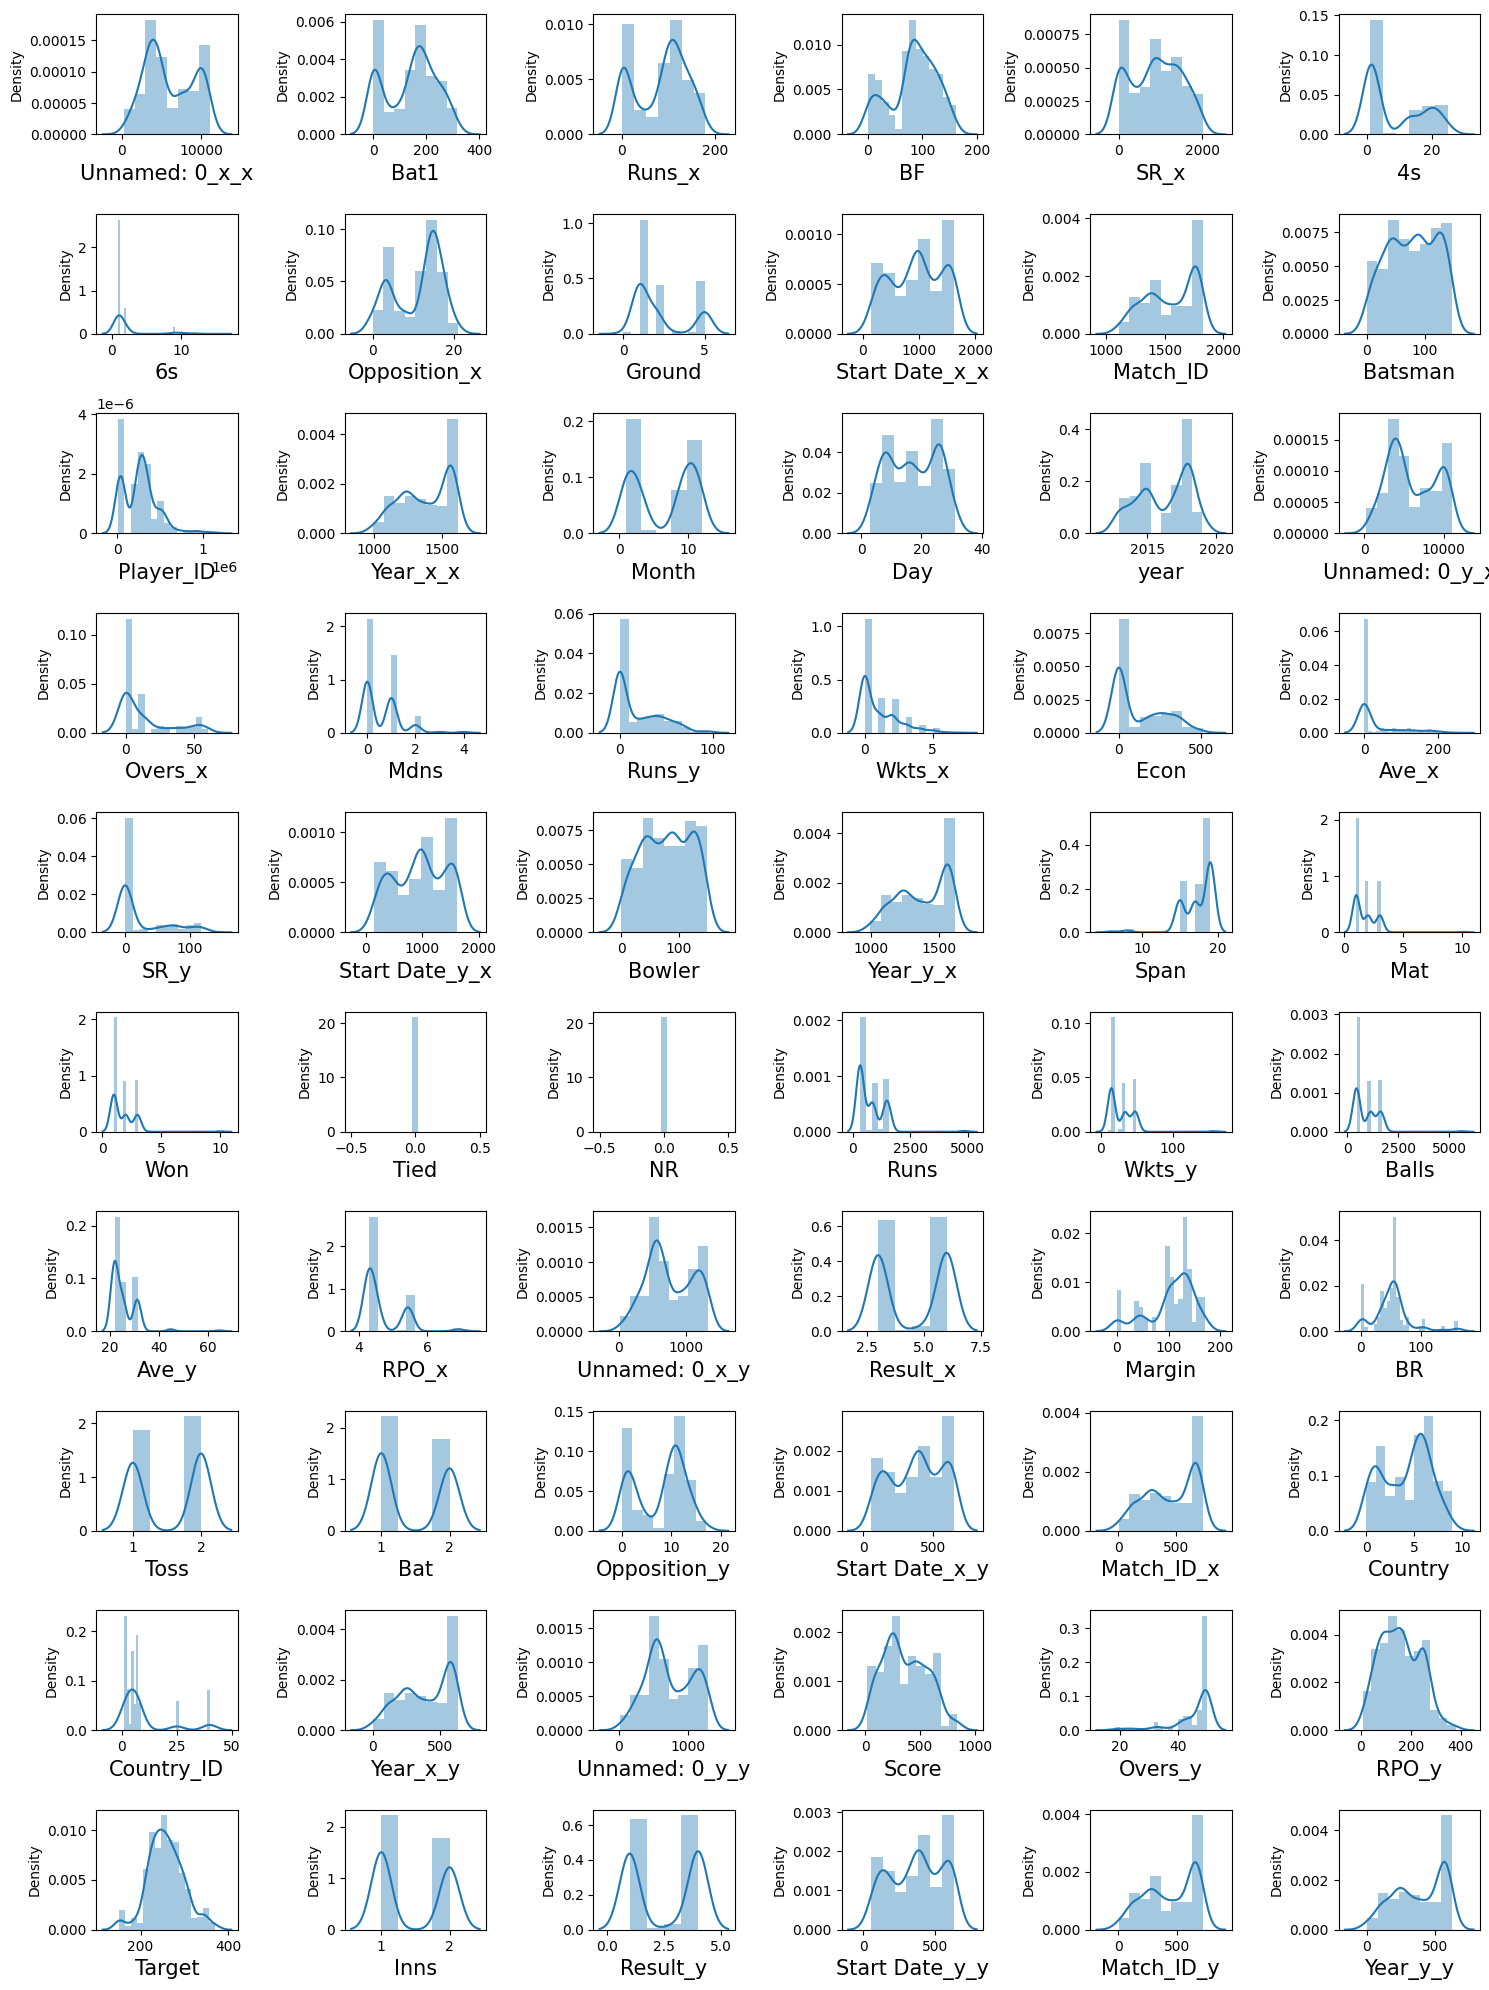

In [122]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.distplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [164]:
master_after_join.skew()

Unnamed: 0_x_x              0.230161
Bat1                       -0.262580
Runs_x                     -0.377580
BF                         -0.463137
SR_x                       -0.072930
                              ...   
Bowling Average             1.481126
Strike Rate (Batting)       4.043750
Economy Rate (Bowling)      1.132434
Maiden Overs Total          0.000000
Player Performance Score    0.366887
Length: 67, dtype: float64

In [125]:
master_after_join.columns

Index(['Unnamed: 0_x_x', 'Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s',
       'Opposition_x', 'Ground', 'Start Date_x_x', 'Match_ID', 'Batsman',
       'Player_ID', 'Year_x_x', 'Month', 'Day', 'year', 'Unnamed: 0_y_x',
       'Overs_x', 'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y',
       'Start Date_y_x', 'Bowler', 'Year_y_x', 'Span', 'Mat', 'Won', 'Tied',
       'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x', 'Unnamed: 0_x_y',
       'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y',
       'Start Date_x_y', 'Match_ID_x', 'Country', 'Country_ID', 'Year_x_y',
       'Unnamed: 0_y_y', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Start Date_y_y', 'Match_ID_y', 'Year_y_y', 'Player',
       'Batting Average', 'Bowling Average', 'Strike Rate (Batting)',
       'Economy Rate (Bowling)', 'Maiden Overs Total',
       'Player Performance Score'],
      dtype='object')

In [165]:
master_after_join.skew()[(master_after_join.skew() >= 0.5) & (master_after_join.skew() >= -0.5)]

4s                        0.522961
6s                        2.851741
Ground                    1.082039
Player_ID                 0.980940
Overs_x                   1.240792
Mdns                      1.408542
Runs_y                    0.988437
Wkts_x                    1.306104
Econ                      0.722870
Ave_x                     1.795239
SR_y                      1.349940
Mat                       0.633765
Won                       0.633765
Runs                      0.715791
Ave_y                     3.892558
RPO_x                     1.629918
Country_ID                2.084455
Bowling Average           1.481126
Strike Rate (Batting)     4.043750
Economy Rate (Bowling)    1.132434
dtype: float64

In [166]:
skew_col=['4s','6s','Ground','Player_ID','Overs_x','Mdns','Runs_y','Wkts_x','Econ','Ave_x','SR_y','Mat','Won','Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x','BR','Country_ID','Bowling Average','Bowling Average','Economy Rate (Bowling)']
len(skew_col)

23

In [170]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
import warnings

# Specify the columns you want to transform
skew_col = ["column_name_1", "column_name_2", ...]  # Replace with actual column names

# Check if the specified columns are in the DataFrame
missing_columns = set(skew_col) - set(master_after_join.columns)
if missing_columns:
    print(f"The following columns are missing in the DataFrame: {missing_columns}")
else:
    # Suppress warnings temporarily
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)  # Ignore the warning
        pt = PowerTransformer()
        master_after_join[skew_col] = pt.fit_transform(master_after_join[skew_col])

    # Continue with your code
    # master_after_join[skew_col] is now transformed


The following columns are missing in the DataFrame: {'column_name_1', Ellipsis, 'column_name_2'}


In [171]:
master_after_join.skew()

Unnamed: 0_x_x              0.230161
Bat1                       -0.262580
Runs_x                     -0.377580
BF                         -0.463137
SR_x                       -0.072930
                              ...   
Bowling Average             1.481126
Strike Rate (Batting)       4.043750
Economy Rate (Bowling)      1.132434
Maiden Overs Total          0.000000
Player Performance Score    0.366887
Length: 67, dtype: float64

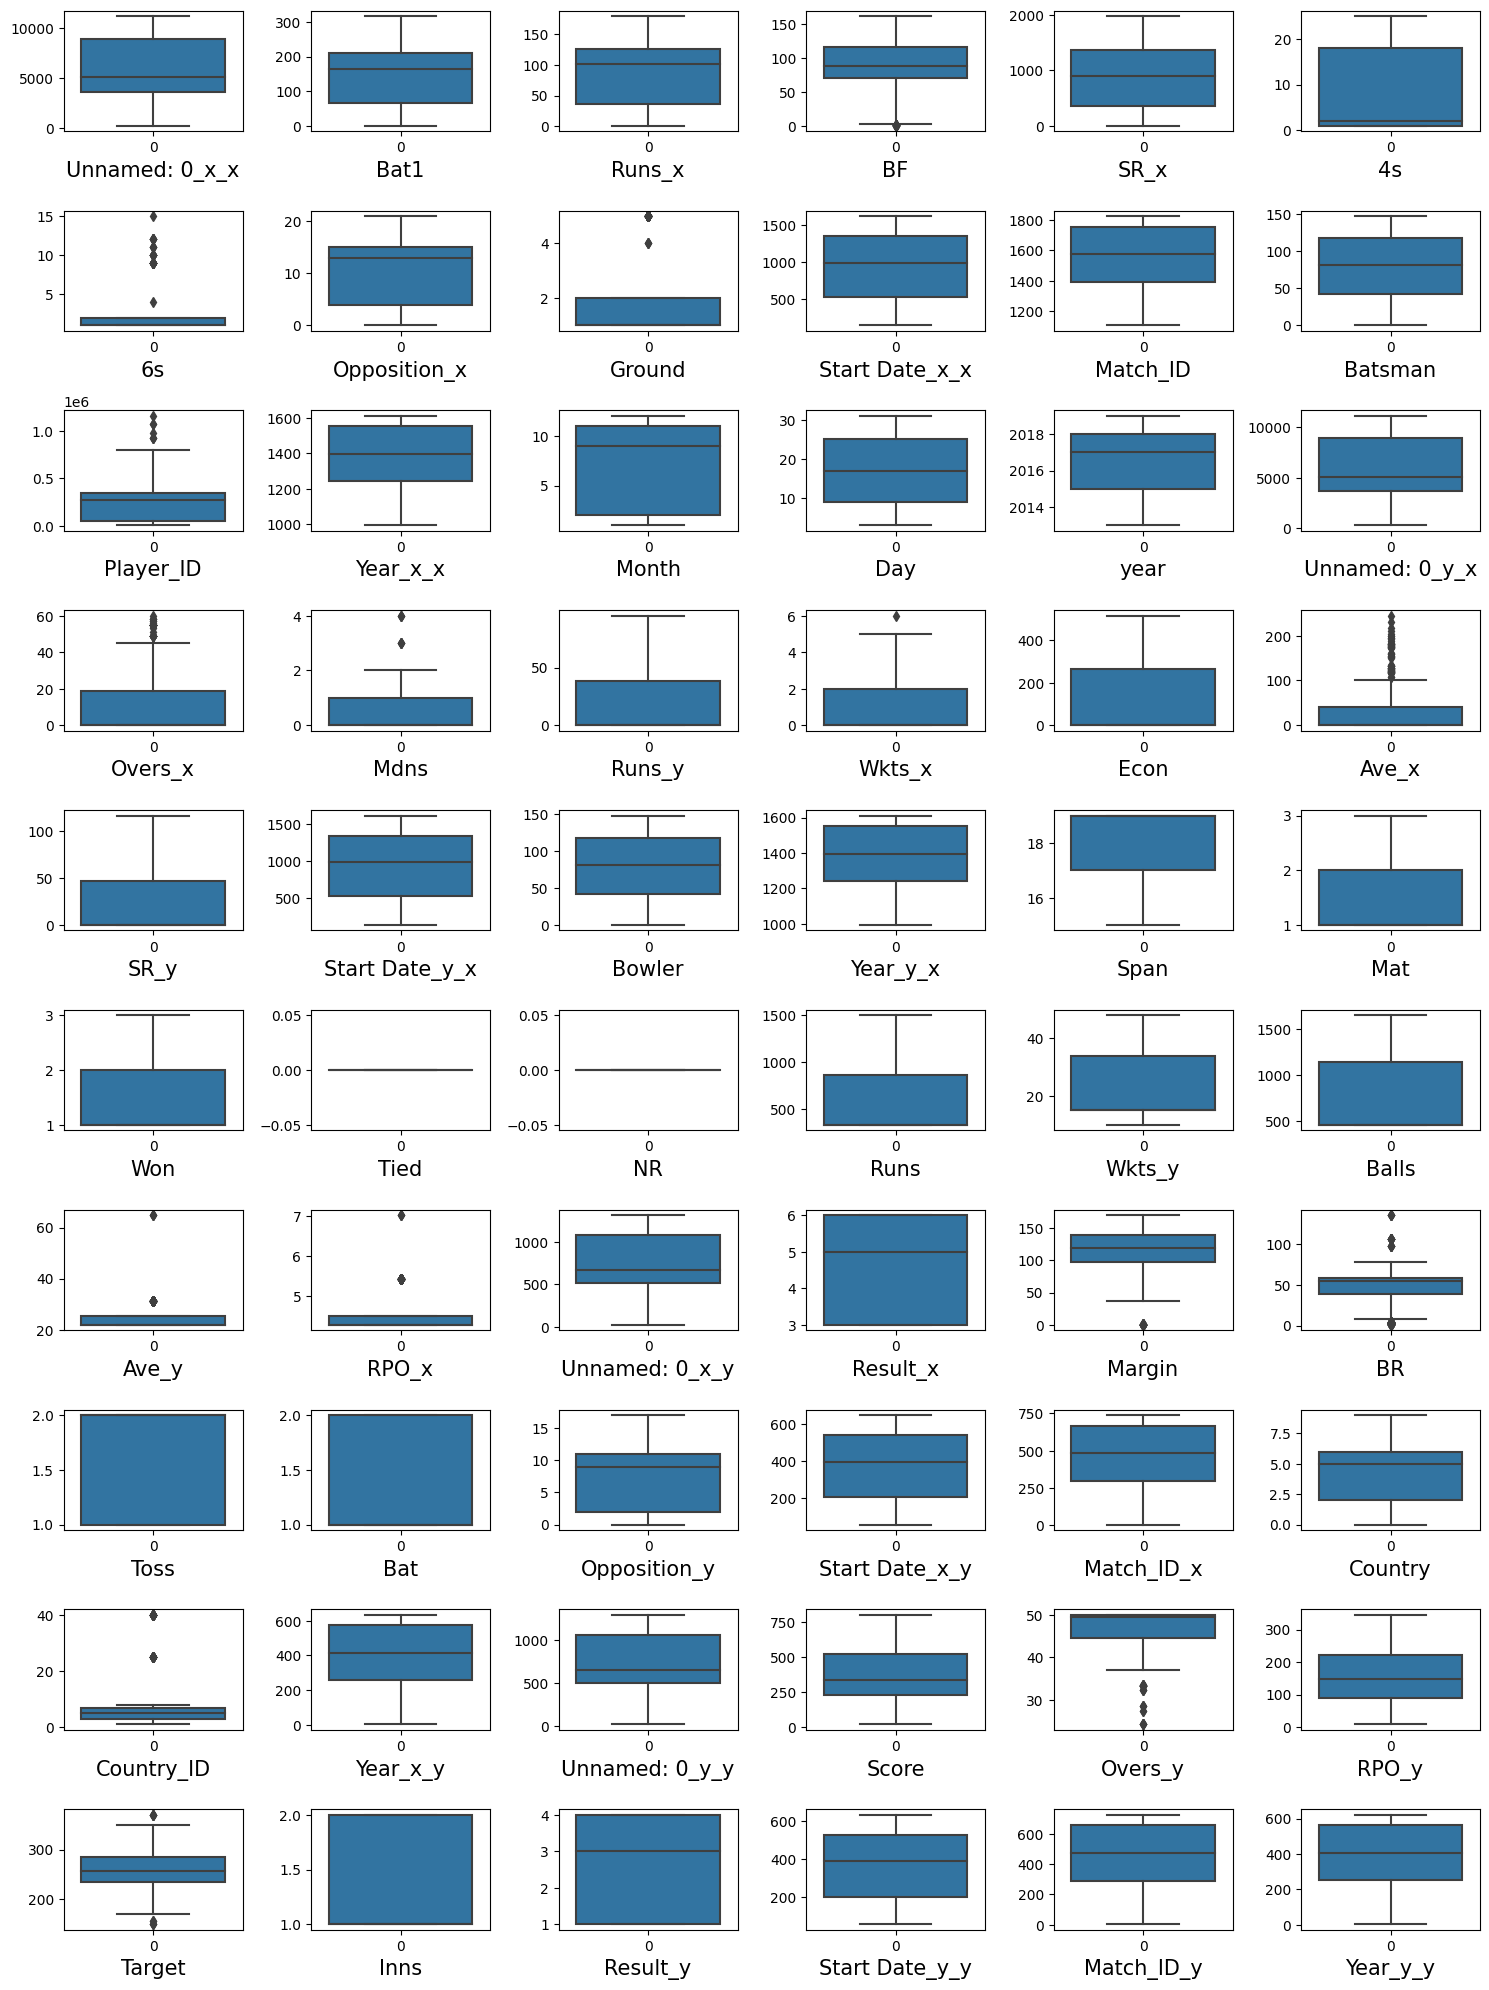

In [172]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [173]:
outliers_col=['Margin', 'BR','Overs_y','Target','Ground','Span','Strike Rate (Batting)','Player Performance Score']

In [174]:
from scipy.stats import zscore
z_score=zscore(master_after_join[outliers_col])
z_score_abs=np.abs(z_score)
filter_entry=(z_score_abs<3).all(axis=1)
master_after_join=master_after_join[filter_entry]
master_after_join.head()

,Unnamed: 0_x_x,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Start Date_x_x,...,Start Date_y_y,Match_ID_y,Year_y_y,Player,Batting Average,Bowling Average,Strike Rate (Batting),Economy Rate (Bowling),Maiden Overs Total,Player Performance Score
0,1152,0,1,108,1,1,1,15,1,915,...,355.0,123.0,112.0,80,0.0,2.733333,0.000000,0.845361,262,0.179688
1,1153,0,1,2,1,1,1,15,1,1031,...,409.0,125.0,114.0,80,0.0,3.933333,0.000000,1.194332,262,0.256694
2,1199,2,2,130,518,1,1,0,1,482,...,184.0,648.0,558.0,80,1.0,4.600000,1.538462,1.674757,262,0.324796
4,1478,277,158,141,4,2,1,15,1,915,...,355.0,123.0,112.0,78,277.0,0.000000,196.453901,0.000000,262,0.267204
5,1479,205,122,99,256,18,11,15,1,1031,...,409.0,125.0,114.0,78,102.5,0.000000,207.070707,0.000000,262,0.102335


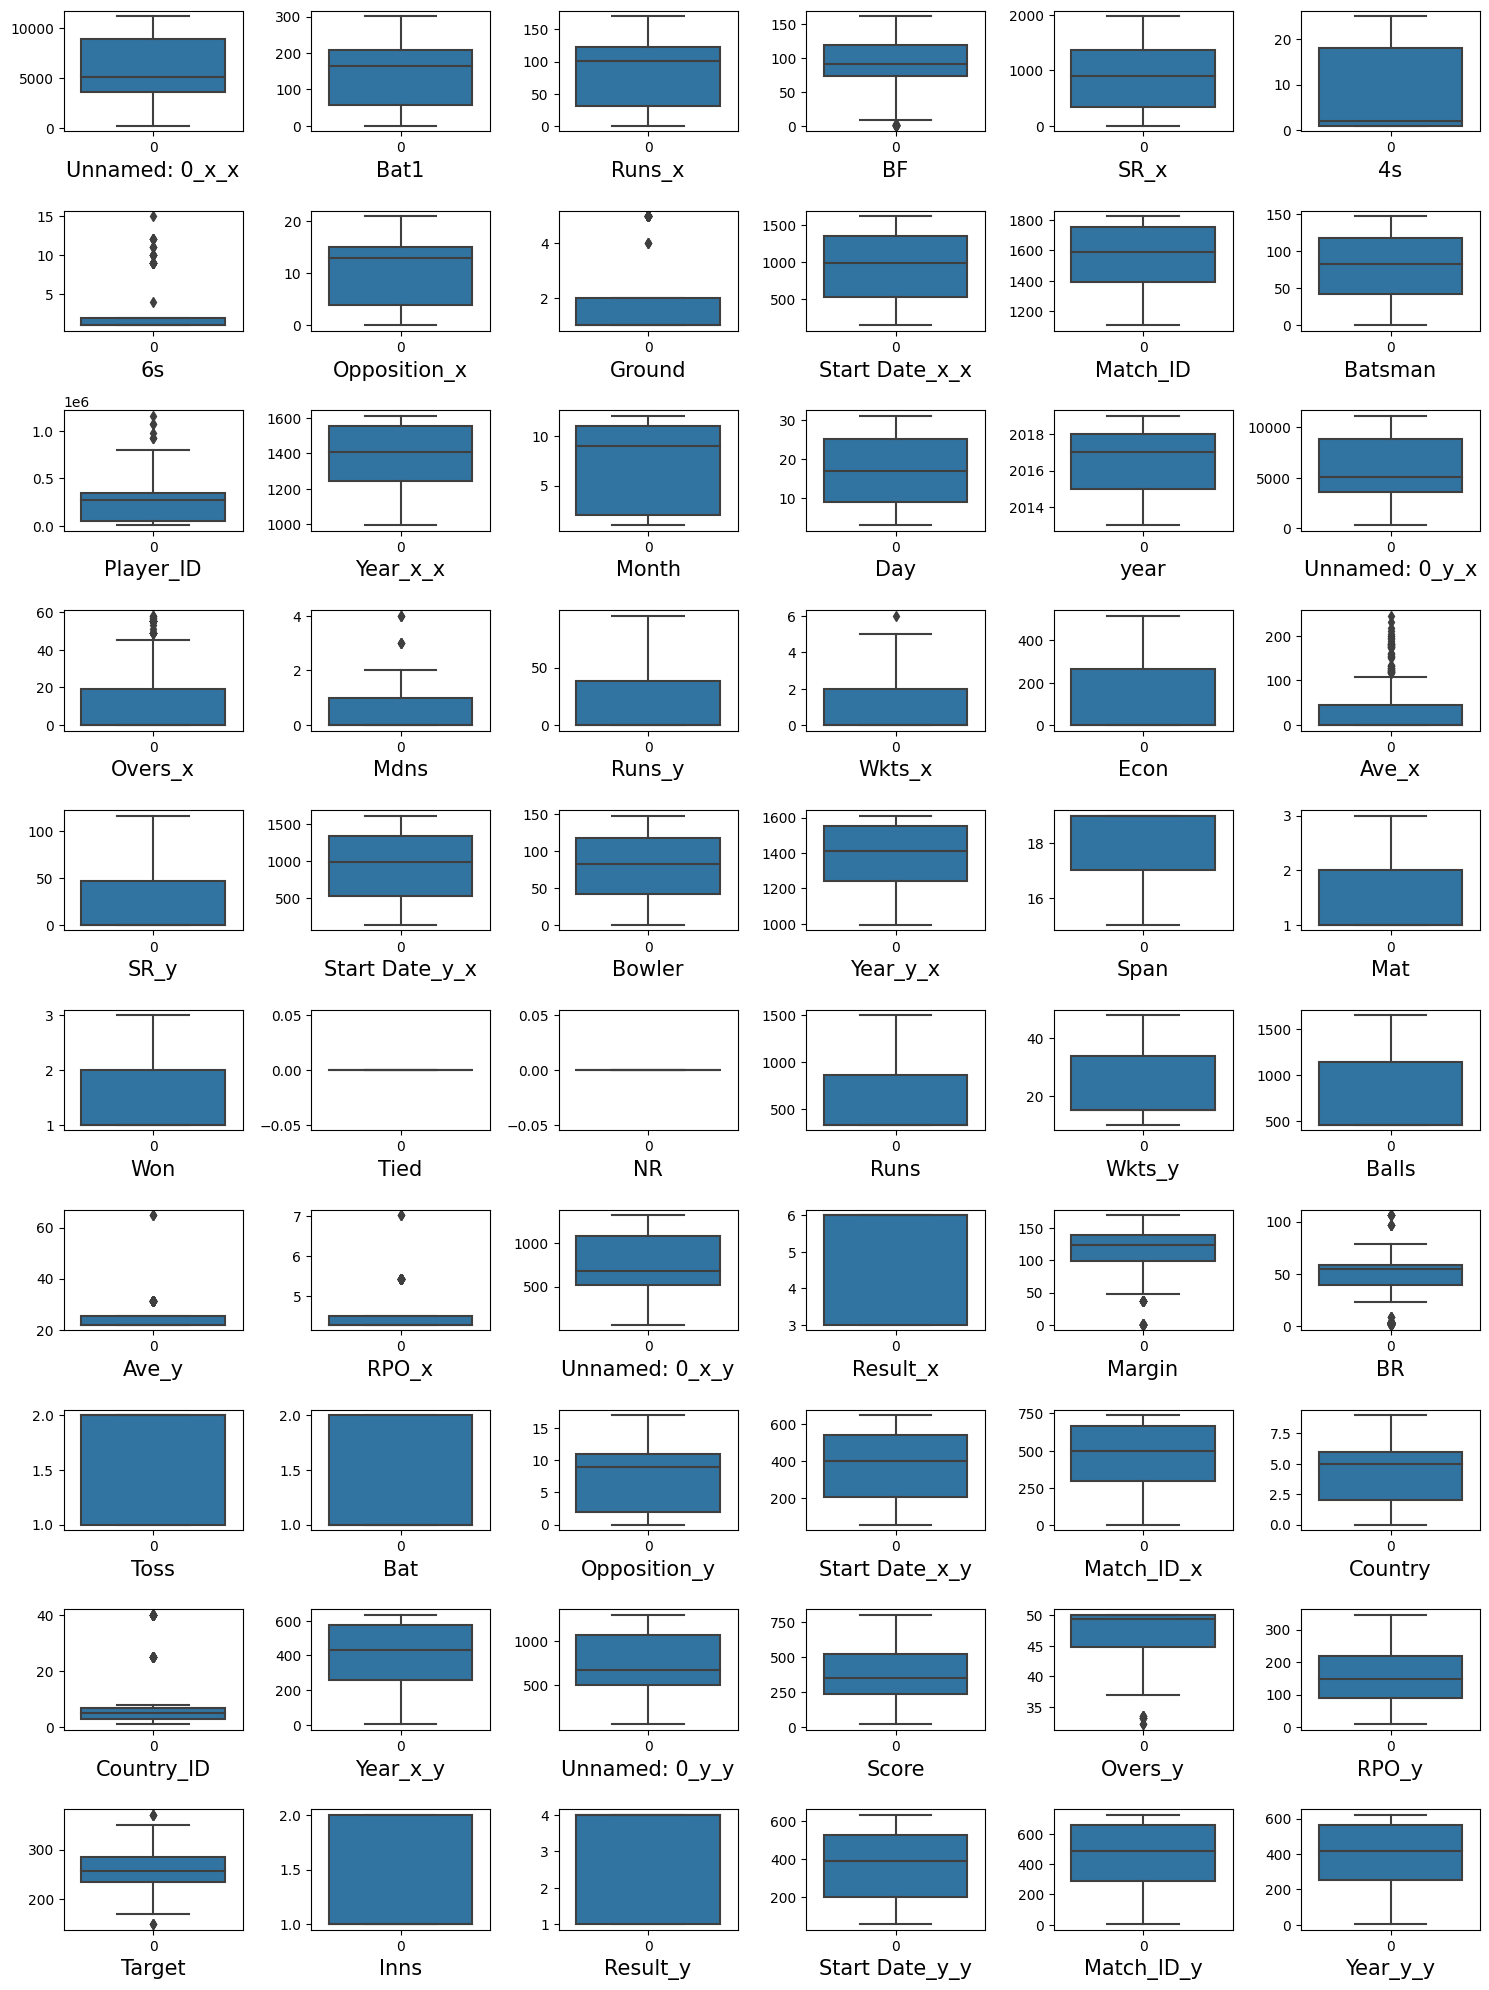

In [175]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [176]:
x = master_after_join[['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
          'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
          'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
          'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
          'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
          'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
          'Result_y', 'Match_ID_y']]

y = master_after_join['Player Performance Score']  # Target column

In [177]:
print(x.shape, y.shape)


(382, 48) (382,)


In [178]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

             vif       featurs
0   3.269519e+02          Bat1
1   3.301934e+02        Runs_x
2   1.448446e+00            BF
3   1.285498e+00          SR_x
4   1.465098e+00            4s
5   1.372220e+00            6s
6   9.863231e+01  Opposition_x
7            inf        Ground
8            inf      Match_ID
9   3.653395e+04       Batsman
10  1.316681e+00     Player_ID
11  2.502880e+01         Month
12  2.046594e+00           Day
13  5.609552e+02          year
14  2.541022e+00       Overs_x
15  3.382451e+00          Mdns
16  4.765348e+00        Runs_y
17  3.699607e+00        Wkts_x
18  4.772239e+00          Econ
19  5.620303e+00         Ave_x
20  5.809611e+00          SR_y
21  3.652639e+04        Bowler
22           inf          Span
23           inf           Mat
24           inf           Won
25           NaN          Tied
26           NaN            NR
27           inf          Runs
28           inf        Wkts_y
29           inf         Balls
30           inf         Ave_y
31      

In [180]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)

array([[-1.78017865e+00,  8.96151743e-02, -1.90875876e+00, ...,
        -4.37018574e-16, -9.81581673e-17,  5.83707362e-17],
       [-1.71389496e+00,  1.11759525e+00, -2.22662869e+00, ...,
        -5.12654233e-17,  5.89808993e-16, -2.23486521e-16],
       [-3.71945029e+00,  4.25869063e+00,  2.64392514e+00, ...,
        -1.48684073e-16, -1.64300313e-16,  1.02904359e-16],
       ...,
       [ 4.85197127e+00,  3.62469159e+00, -6.84448078e-01, ...,
        -2.12097081e-16, -1.14218296e-16,  3.77853162e-16],
       [ 4.47907122e+00,  3.95044081e+00, -8.75748433e-01, ...,
         4.42453301e-17, -1.23907031e-16,  1.64070360e-16],
       [ 5.40790870e+00,  6.29543298e-01, -6.29788581e-01, ...,
         2.44098291e-17,  5.58017413e-17,  7.17787044e-17]])

Text(0.5, 1.0, 'PCA Plot')

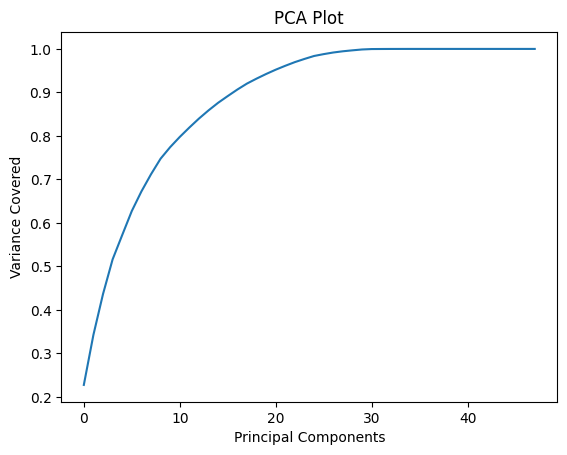

In [181]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA Plot")

In [182]:
pca=PCA(n_components=19)
pca_x=pca.fit_transform(x_scaled)
pca_x=pd.DataFrame(pca_x,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
pca_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-1.780179,0.089615,-1.908759,4.111521,1.022322,-2.608996,1.106121,0.916108,1.231767,1.035286,1.379806,-0.418186,0.045906,0.000491,-0.585730,-1.110973,-0.098827,-1.192723,-1.208514
1,-1.713895,1.117595,-2.226629,4.374984,-0.151865,-2.765959,-2.378132,-2.211373,-0.448507,-0.664775,-0.065006,0.217823,-0.014744,-0.421783,-1.267156,-0.475747,0.930867,1.146221,-1.508398
2,-3.719450,4.258691,2.643925,1.784080,-0.456599,-0.431031,-0.596678,-0.818432,-0.209892,2.035181,-0.256351,-0.356268,0.756313,-1.872556,1.708946,-1.231038,-1.033268,-1.141549,0.588060
3,-0.955785,-2.932800,-1.051787,2.574654,-1.330792,-0.806589,1.802227,1.950894,1.066002,0.774646,1.314345,0.064560,2.800097,-0.429005,-0.961267,0.485478,0.339517,-0.669089,-0.625229
4,-0.346089,-3.600031,-0.857117,2.271008,-2.996703,-1.357791,-1.500980,-1.502187,-1.397820,-0.504953,1.814257,2.172297,0.806483,-0.158005,-1.050635,0.231584,-1.319687,0.884925,-1.280485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,4.755542,2.718821,-0.162691,-1.919801,-0.247878,0.773084,0.430928,-0.983592,1.103450,1.785805,-0.017376,0.593483,-0.924590,1.525235,-1.990089,-0.719698,0.561464,-1.230439,-1.626484
378,3.568015,2.665933,2.153443,1.308985,2.022843,3.225029,0.625361,2.966997,0.715287,-0.394350,0.505312,1.277207,-1.021227,1.704868,-0.284139,-0.794315,-0.536122,-0.858251,0.168107
379,4.851971,3.624692,-0.684448,0.064708,0.512028,-0.233266,-1.836642,-1.791253,-1.956957,-1.109097,0.033422,-1.121728,1.831216,1.031120,1.207118,-1.520171,-1.550378,-0.092237,-1.148564
380,4.479071,3.950441,-0.875748,-1.916647,-0.387061,1.290869,-0.559135,-0.321619,1.104617,1.674606,-0.746091,0.683902,0.908518,1.201890,-1.187900,0.353976,1.491136,1.052690,-0.311092


In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= i )
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    y_pred=lr.predict(x_train) # prediction on train data
    r1 =r2_score(y_train,y_pred) # accuracy check on train data
    
    pred = lr.predict(x_test)   #prediction on test data
    r2 =r2_score(y_test,pred) #accuracy check on test data
    
    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.81406624463228
at random sate 1, the testing accuracy is:- 0.8260996743253769


at random sate 2, the training accuracy is:- 0.81406624463228
at random sate 2, the testing accuracy is:- 0.8260996743253769


at random sate 3, the training accuracy is:- 0.81406624463228
at random sate 3, the testing accuracy is:- 0.8260996743253769


at random sate 4, the training accuracy is:- 0.81406624463228
at random sate 4, the testing accuracy is:- 0.8260996743253769


at random sate 5, the training accuracy is:- 0.81406624463228
at random sate 5, the testing accuracy is:- 0.8260996743253769


at random sate 6, the training accuracy is:- 0.81406624463228
at random sate 6, the testing accuracy is:- 0.8260996743253769


at random sate 7, the training accuracy is:- 0.81406624463228
at random sate 7, the testing accuracy is:- 0.8260996743253769


at random sate 8, the training accuracy is:- 0.81406624463228
at random sate 8, the testing accuracy is:- 0.826

at random sate 79, the training accuracy is:- 0.81406624463228
at random sate 79, the testing accuracy is:- 0.8260996743253769


at random sate 80, the training accuracy is:- 0.81406624463228
at random sate 80, the testing accuracy is:- 0.8260996743253769


at random sate 81, the training accuracy is:- 0.81406624463228
at random sate 81, the testing accuracy is:- 0.8260996743253769


at random sate 82, the training accuracy is:- 0.81406624463228
at random sate 82, the testing accuracy is:- 0.8260996743253769


at random sate 83, the training accuracy is:- 0.81406624463228
at random sate 83, the testing accuracy is:- 0.8260996743253769


at random sate 84, the training accuracy is:- 0.81406624463228
at random sate 84, the testing accuracy is:- 0.8260996743253769


at random sate 85, the training accuracy is:- 0.81406624463228
at random sate 85, the testing accuracy is:- 0.8260996743253769


at random sate 86, the training accuracy is:- 0.81406624463228
at random sate 86, the testing acc

at random sate 164, the training accuracy is:- 0.81406624463228
at random sate 164, the testing accuracy is:- 0.8260996743253769


at random sate 165, the training accuracy is:- 0.81406624463228
at random sate 165, the testing accuracy is:- 0.8260996743253769


at random sate 166, the training accuracy is:- 0.81406624463228
at random sate 166, the testing accuracy is:- 0.8260996743253769


at random sate 167, the training accuracy is:- 0.81406624463228
at random sate 167, the testing accuracy is:- 0.8260996743253769


at random sate 168, the training accuracy is:- 0.81406624463228
at random sate 168, the testing accuracy is:- 0.8260996743253769


at random sate 169, the training accuracy is:- 0.81406624463228
at random sate 169, the testing accuracy is:- 0.8260996743253769


at random sate 170, the training accuracy is:- 0.81406624463228
at random sate 170, the testing accuracy is:- 0.8260996743253769


at random sate 171, the training accuracy is:- 0.81406624463228
at random sate 171,

In [184]:
rand_state

187

In [185]:
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= rand_state )

In [186]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(267, 19)
(115, 19)
(267,)
(115,)


In [188]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()

from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor()


import xgboost as xgb
xgb=xgb.XGBRegressor()

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

from sklearn.model_selection import cross_val_score


models=[]
models.append(('LinearRegression', LR))
models.append(('DecisionTreeRegressor', dt))
models.append(('AdaBoostRegressor', ada))
models.append(('GradientBoostingRegressor', gb))
models.append(('RandomForestRegressor', rfc))
models.append(('XGBRegressor', xgb))
models.append(('KNeighborsRegressor', knn))

In [189]:
m=[]
score=[]
score2=[]
cv_score=[]
MAE_score=[]
MSE_score=[]
for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred=model.predict(x_train)
    AS=r2_score(y_train,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)
    
    pred=model.predict(x_test)
    AS2=r2_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    MAE=mae(y_test,pred)
    print("Mean Squered Error:",MAE)
    MAE_score.append(MAE*100)
    MSE=mse(y_test,pred)
    print("Mean Absolute Error:", MSE)
    MSE_score.append(MSE*100)
    
    accuracies= cross_val_score(model,x,y, cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')


*********************** LinearRegression ***********************
LinearRegression()
Train Report: 0.8189374725056253
Test Report: 0.8261116455198325
Mean Squered Error: 0.03316700561852092
Mean Absolute Error: 0.0018267063996987019
Accuracy: 88.08 %
Standard Deviation: 0.28 %


*********************** DecisionTreeRegressor ***********************
DecisionTreeRegressor()
Train Report: 1.0
Test Report: 0.2565786121989726
Mean Squered Error: 0.06519434600844241
Mean Absolute Error: 0.007809681164841392
Accuracy: 82.54 %
Standard Deviation: 2.16 %


*********************** AdaBoostRegressor ***********************
AdaBoostRegressor()
Train Report: 0.8180538015053138
Test Report: 0.6066337798942967
Mean Squered Error: 0.05384668979743491
Mean Absolute Error: 0.004132333035415152
Accuracy: 84.85 %
Standard Deviation: 1.28 %


*********************** GradientBoostingRegressor ***********************
GradientBoostingRegressor()
Train Report: 0.9837360416677723
Test Report: 0.6574810973372263
M

In [190]:
print(len(m),len(score),len(score2),len(cv_score),len(MAE_score),len(MSE_score))

7 7 7 7 7 7


In [191]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score, 'MAE_score':MAE_score,'MSE_score':MSE_score })
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score
0,LinearRegression,81.893747,82.611165,88.078442,3.316701,0.182671
1,DecisionTreeRegressor,100.000000,25.657861,82.536297,6.519435,0.780968
2,AdaBoostRegressor,81.805380,60.663378,84.848167,5.384669,0.413233
3,GradientBoostingRegressor,98.373604,65.748110,91.956945,4.495145,0.359818
4,RandomForestRegressor,95.411826,58.682643,90.507273,5.162350,0.434041
5,XGBRegressor,99.997023,65.073419,91.799485,4.541773,0.366906
6,KNeighborsRegressor,76.424656,59.687452,-38.632986,4.985995,0.423485


In [192]:
result['lest_diff']=(result['Accuracy_test_score']-result['Cross_val_score'])
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score,lest_diff
0,LinearRegression,81.893747,82.611165,88.078442,3.316701,0.182671,-5.467278
1,DecisionTreeRegressor,100.000000,25.657861,82.536297,6.519435,0.780968,-56.878436
2,AdaBoostRegressor,81.805380,60.663378,84.848167,5.384669,0.413233,-24.184789
3,GradientBoostingRegressor,98.373604,65.748110,91.956945,4.495145,0.359818,-26.208835
4,RandomForestRegressor,95.411826,58.682643,90.507273,5.162350,0.434041,-31.824630
5,XGBRegressor,99.997023,65.073419,91.799485,4.541773,0.366906,-26.726066
6,KNeighborsRegressor,76.424656,59.687452,-38.632986,4.985995,0.423485,98.320438


In [194]:
from sklearn.model_selection import RandomizedSearchCV

para={'n_jobs':range(1,55)}
rand=RandomizedSearchCV(estimator=LR, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'n_jobs': 34}

In [195]:
LR.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=r2_score(y_train,y_pred)
print("Train Report:",AS*100) 
pred=LR.predict(x_test)
AS2=r2_score(y_test,pred)
print("Test Report:",AS2*100)
MAE=mae(y_test,pred)
print("Mean Squered Error:",MAE)
MSE=mse(y_test,pred)
print("Mean Absolute Error:", MSE)
    
accuracies= cross_val_score(LR,x_scaled, y, cv=5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Train Report: 81.80538015053138
Test Report: 82.61116455198325
Mean Squered Error: 0.03316700561852092
Mean Absolute Error: 0.0018267063996987019
Accuracy: 91.64 %
Standard Deviation: 1.47 %


In [196]:
import pickle
file='Final_CR_Performance_model.pickle'
model=pickle.dump(LR,open(file,'wb'))